---------------------------------------------------------------------------------------------------------------------
# [Spotify App Reviews](https://www.kaggle.com/datasets/mfaaris/spotify-app-reviews-2022)
---------------------------------------------------------------------------------------------------------------------

The purpose of this project is to implement KPIs "from scratch" for Spotify Customer Experience, defined in **5 parts:**

---------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt #Import matplotlib library 
import seaborn as sns
import nltk
# !pip install wordcloud
# !pip install nltk
# nltk.download('vader_lexicon')
# !pip install WordCloud  --quiet 

---------------------------------------------------------------------------------------------------------------------
# Part I - Reading the main Dataset from Kaggle as the Source
---------------------------------------------------------------------------------------------------------------------


In [2]:
spoti_reviews = pd.read_csv('./Data/Spoti_reviews.csv', sep=',')
spoti_reviews.head()

Time_submitted                                             Review  \
0  2022-07-09 15:00:00  Great music service, the audio is high quality...   
1  2022-07-09 14:21:22  Please ignore previous negative rating. This a...   
2  2022-07-09 13:27:32  This pop-up "Get the best Spotify experience o...   
3  2022-07-09 13:26:45    Really buggy and terrible to use as of recently   
4  2022-07-09 13:20:49  Dear Spotify why do I get songs that I didn't ...   

   Rating  Total_thumbsup Reply  
0       5               2   NaN  
1       5               1   NaN  
2       4               0   NaN  
3       1               1   NaN  
4       1               1   NaN

In [3]:
spoti_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time_submitted  61594 non-null  object
 1   Review          61594 non-null  object
 2   Rating          61594 non-null  int64 
 3   Total_thumbsup  61594 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


---------------------------------------------------------------------------------------------------------------------
# Part II - Data Cleaning
---------------------------------------------------------------------------------------------------------------------

Ensures that data is error/duplicate-free, normalized, improving the quality of data for better accuracy of results.

This process is defined further in **7 steps:**

---------------------------------------------------------------------------------------------------------------------

### 1. Convert text to lowercase

In [4]:
# Convert text to lowercase

import re
spoti_reviews['Review'] = spoti_reviews['Review'].str.lower()

In [5]:
spoti_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time_submitted  61594 non-null  object
 1   Review          61594 non-null  object
 2   Rating          61594 non-null  int64 
 3   Total_thumbsup  61594 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


#### So far the Dataframe contains 61594 records.
 I am going to drop duplicated reviews (just in case)

In [6]:
# Drop duplicates

spoti_reviews.drop_duplicates(subset=['Review'], inplace=True)
spoti_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61330 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time_submitted  61330 non-null  object
 1   Review          61330 non-null  object
 2   Rating          61330 non-null  int64 
 3   Total_thumbsup  61330 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.8+ MB


#### I  removed 264 duplicated records from "reviews".
Now, I am going to drop columns not relevant for me:

In [7]:
# Dropping columns
spoti_reviews.drop(columns='Total_thumbsup', inplace=True)

# Replace NaN with 'No'
spoti_reviews['Reply'] = spoti_reviews['Reply'].fillna('No')

# Replace any value other than 'No' with 'Yes'
spoti_reviews['Reply'] = spoti_reviews['Reply'].apply(lambda reply: 'Yes' if reply != 'No' else 'No')

# Renaming columns ('Time_submitted' to 'Date')
spoti_reviews.rename(columns={'Time_submitted':'Date','Reply':'Is replied?'}, inplace=True)
spoti_reviews.head()

Date                                             Review  \
0  2022-07-09 15:00:00  great music service, the audio is high quality...   
1  2022-07-09 14:21:22  please ignore previous negative rating. this a...   
2  2022-07-09 13:27:32  this pop-up "get the best spotify experience o...   
3  2022-07-09 13:26:45    really buggy and terrible to use as of recently   
4  2022-07-09 13:20:49  dear spotify why do i get songs that i didn't ...   

   Rating Is replied?  
0       5          No  
1       5          No  
2       4          No  
3       1          No  
4       1          No

### 2. Removing Stopwords

In [8]:
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Updating Stop Words

stop_words_upd = stop_words.copy()
stop_words_upd = ' '.join(stop_words)
stop_words_upd = re.sub(r'[^a-zA-Z0-9\s]', '', stop_words_upd)
stop_words_upd = set(stop_words_upd.split())

 # Struggling with these new other ones
stop_words_upd.update(['im','co', 'https', 'http', 'amp', 'spotify', 'cant','i', 'me', 'my', 'myself',
                       'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he',
                       'him', 'his', 'himself', 'she', 'her', 'hers',    'herself', 'it', 'its', 'itself', 'they',
                       'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that',
                       'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has',
                       'had', 'having', 'do', 'does','did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or',
                       'because', 'as', 'until','while', 'of', 'at', 'by', 'for', 'with', 'about', 'against',
                       'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to',
                       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',
                       'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both',
                       'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only',
                       'own', 'same', 'so','than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should',
                       'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn',
                       'hasn', 'haven','isn', 'ma', 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren',
                       'won', 'wouldn','itll','really','ive','u','sometimes','since','ever','let','say','month','could',
                      'thats','recently'])

stop_words = stop_words_upd | stop_words
print(stop_words)

{'thatll', 'to', "it's", 'my', 're', "shouldn't", "she's", "wouldn't", 'mightn', 'itself', 'up', 'really', 'sometimes', 'above', 'after', 'herself', 'co', 'you', 'theirs', 'now', 'once', 'of', 'any', 'down', 'both', 'she', 'been', 'did', 'below', 'mustn', 'from', 'those', 'youve', "you're", 'if', 'myself', 'ours', 'will', 'd', 'our', 'just', 'its', 'hadn', 'let', 'or', 'youre', 'shant', 'isnt', 'which', 'when', 'im', 'm', 'mustnt', 'u', 'wasn', 'me', 'by', 'than', "don't", 'youll', "didn't", 'until', 'ive', 'had', 'yours', 'yourselves', "that'll", 'itll', 'we', 'how', 'all', 'for', 'with', 'don', 'as', 'where', 'each', 'cant', "you'd", 'are', 'again', 'them', 'amp', 'shes', "couldn't", 'hasnt', 'didn', 'arent', 'such', 'do', 'at', 'in', 'does', 'can', 'aren', 'could', 'hers', "hasn't", 'since', 'didnt', 'shouldnt', 'own', 'while', 'here', 'and', 'before', 'his', 'between', 'he', 'am', 'doesn', "isn't", 'havent', 'other', 'ain', 'neednt', 'her', "you've", 'a', 'y', "haven't", 'hadnt', '

#### Defining the 'Stop Words' function:

In [9]:
def stop_word(content):

    # Split the content into words
    words = content.split()

    # Remove stop words
    cleaned_words = [word for word in words if word.lower() not in stop_words]

    # Join the cleaned words back into a string
    cleaned_text = ' '.join(cleaned_words)
    
    return cleaned_text

spoti_reviews['Tagging'] = spoti_reviews['Review'].apply(stop_word)
spoti_reviews.head()

Date                                             Review  \
0  2022-07-09 15:00:00  great music service, the audio is high quality...   
1  2022-07-09 14:21:22  please ignore previous negative rating. this a...   
2  2022-07-09 13:27:32  this pop-up "get the best spotify experience o...   
3  2022-07-09 13:26:45    really buggy and terrible to use as of recently   
4  2022-07-09 13:20:49  dear spotify why do i get songs that i didn't ...   

   Rating Is replied?                                            Tagging  
0       5          No  great music service, audio high quality app ea...  
1       5          No  please ignore previous negative rating. app su...  
2       4          No  pop-up "get best experience android 12" annoyi...  
3       1          No                                 buggy terrible use  
4       1          No       dear get songs put playlist??? shuffle play?

In [10]:
# Testing
spoti_reviews['Tagging'][4755]

'false advertisement well ihave using jio savan iam sick adds middle songs uninstalled app. coincidentally saw soo many adds related telling add free, reason iam sold. installing 1st day normal adds, started nxt day. many adds foe every single sond add, showing adds advertise add free.'

### 3. No punk_tuations (punctuations)

In [11]:
# Removing Punctuation Marks

spoti_reviews['Tagging'] = spoti_reviews['Tagging'].apply(lambda review: stop_word(re.sub(r'[^a-zA-Z0-9\s]', '', review)))
spoti_reviews.head()

Date                                             Review  \
0  2022-07-09 15:00:00  great music service, the audio is high quality...   
1  2022-07-09 14:21:22  please ignore previous negative rating. this a...   
2  2022-07-09 13:27:32  this pop-up "get the best spotify experience o...   
3  2022-07-09 13:26:45    really buggy and terrible to use as of recently   
4  2022-07-09 13:20:49  dear spotify why do i get songs that i didn't ...   

   Rating Is replied?                                            Tagging  
0       5          No  great music service audio high quality app eas...  
1       5          No  please ignore previous negative rating app sup...  
2       4          No  popup get best experience android 12 annoying ...  
3       1          No                                 buggy terrible use  
4       1          No           dear get songs put playlist shuffle play

In [12]:
# Testing
spoti_reviews['Tagging'][4755]

'false advertisement well ihave using jio savan iam sick adds middle songs uninstalled app coincidentally saw soo many adds related telling add free reason iam sold installing 1st day normal adds started nxt day many adds foe every single sond add showing adds advertise add free'

### 4. Lemmatization
Transform the words into their corresponding root words

In [13]:
from nltk.stem import WordNetLemmatizer

# Create a WordNet Lemmatizer
wn = WordNetLemmatizer()

# Function to lemmatize words
def lemmatize_text(text):
    # Tokenize the text into a list of words
    words = text.split()

    # Remove stopwords
#     stop_words = set(stopwords.words("english"))
    words = [word for word in words if word.lower() not in stop_words]

    # Lemmatize words
    lemmatized_words = [wn.lemmatize(word) for word in words]

    # Join the lemmatized words back into a string
    lemmatized_text = ' '.join(lemmatized_words)
    
    return lemmatized_text

In [14]:
# Apply lemmatization to the 'Reviews Text Cleaned' column

spoti_reviews['Tagging'] = spoti_reviews['Tagging'].apply(lemmatize_text)
spoti_reviews.head()

Date                                             Review  \
0  2022-07-09 15:00:00  great music service, the audio is high quality...   
1  2022-07-09 14:21:22  please ignore previous negative rating. this a...   
2  2022-07-09 13:27:32  this pop-up "get the best spotify experience o...   
3  2022-07-09 13:26:45    really buggy and terrible to use as of recently   
4  2022-07-09 13:20:49  dear spotify why do i get songs that i didn't ...   

   Rating Is replied?                                            Tagging  
0       5          No  great music service audio high quality app eas...  
1       5          No  please ignore previous negative rating app sup...  
2       4          No  popup get best experience android 12 annoying ...  
3       1          No                                 buggy terrible use  
4       1          No            dear get song put playlist shuffle play

In [15]:
# Testing
spoti_reviews['Tagging'][4755]

'false advertisement well ihave using jio savan iam sick add middle song uninstalled app coincidentally saw soo many add related telling add free reason iam sold installing 1st day normal add started nxt day many add foe every single sond add showing add advertise add free'

### 5. No extra spaces

In [16]:
# Remove extra spaces

spoti_reviews['Tagging'] = spoti_reviews['Tagging'].apply(lambda review: stop_word(re.sub("\s+"," ", review)))
spoti_reviews.head()

Date                                             Review  \
0  2022-07-09 15:00:00  great music service, the audio is high quality...   
1  2022-07-09 14:21:22  please ignore previous negative rating. this a...   
2  2022-07-09 13:27:32  this pop-up "get the best spotify experience o...   
3  2022-07-09 13:26:45    really buggy and terrible to use as of recently   
4  2022-07-09 13:20:49  dear spotify why do i get songs that i didn't ...   

   Rating Is replied?                                            Tagging  
0       5          No  great music service audio high quality app eas...  
1       5          No  please ignore previous negative rating app sup...  
2       4          No  popup get best experience android 12 annoying ...  
3       1          No                                 buggy terrible use  
4       1          No            dear get song put playlist shuffle play

In [17]:
# Testing
spoti_reviews['Tagging'][4755]

'false advertisement well ihave using jio savan iam sick add middle song uninstalled app coincidentally saw soo many add related telling add free reason iam sold installing 1st day normal add started nxt day many add foe every single sond add showing add advertise add free'

### 6. No numbers (both text and digits)

In [18]:
# Function to remove numbers and numbers written as words

def remove_numbers(text):
    # Use re.sub() to remove numbers and numbers written as words
    no_numbers = re.sub(r'\b\d+\b|\b(one|two|three|four|five|six|seven|eight|nine|ten)\b', '', text)
    no_numbers = ' '.join(no_numbers.split())
    return no_numbers

In [19]:
spoti_reviews['Tagging'] = spoti_reviews['Tagging'].apply(remove_numbers)
spoti_reviews.head()

Date                                             Review  \
0  2022-07-09 15:00:00  great music service, the audio is high quality...   
1  2022-07-09 14:21:22  please ignore previous negative rating. this a...   
2  2022-07-09 13:27:32  this pop-up "get the best spotify experience o...   
3  2022-07-09 13:26:45    really buggy and terrible to use as of recently   
4  2022-07-09 13:20:49  dear spotify why do i get songs that i didn't ...   

   Rating Is replied?                                            Tagging  
0       5          No  great music service audio high quality app eas...  
1       5          No  please ignore previous negative rating app sup...  
2       4          No  popup get best experience android annoying ple...  
3       1          No                                 buggy terrible use  
4       1          No            dear get song put playlist shuffle play

In [20]:
# Testing
spoti_reviews['Tagging'][4755]

'false advertisement well ihave using jio savan iam sick add middle song uninstalled app coincidentally saw soo many add related telling add free reason iam sold installing 1st day normal add started nxt day many add foe every single sond add showing add advertise add free'

In [21]:
# Checking value type
type(spoti_reviews['Tagging'][4755])

str

### 7. Tokenize Reviews
To extract 'Tags' of most important words and removing 'one-letter' words.

In [22]:
# Tokenizing
spoti_reviews['Tags'] = spoti_reviews['Tagging'].apply(lambda review: [word for word in nltk.tokenize.word_tokenize(review) if len(word) > 1 and word not in stop_words])
spoti_reviews.head()

Date                                             Review  \
0  2022-07-09 15:00:00  great music service, the audio is high quality...   
1  2022-07-09 14:21:22  please ignore previous negative rating. this a...   
2  2022-07-09 13:27:32  this pop-up "get the best spotify experience o...   
3  2022-07-09 13:26:45    really buggy and terrible to use as of recently   
4  2022-07-09 13:20:49  dear spotify why do i get songs that i didn't ...   

   Rating Is replied?                                            Tagging  \
0       5          No  great music service audio high quality app eas...   
1       5          No  please ignore previous negative rating app sup...   
2       4          No  popup get best experience android annoying ple...   
3       1          No                                 buggy terrible use   
4       1          No            dear get song put playlist shuffle play   

                                                Tags  
0  [great, music, service, audio, high, quality, ...  
1  [please, ignore, previous, negative, rating, a...  
2  [popup, get, best, experience, android, annoyi...  
3                             [buggy, terrible, use]  
4    [dear, get, song, put, playlist, shuffle, play]

In [23]:
# spoti_reviews['Tags'][4755]

---------------------------------------------------------------------------------------------------------------------
# Part III - NLP for Sentiment Analysis

---------------------------------------------------------------------------------------------------------------------

Performing **Sentiment Analysis** techniques to categorize reviews as positive, negative, or neutral; providing insights into overall sentiment trends and areas requiring improvement, like **categorizing customer complaints types.**

---------------------------------------------------------------------------------------------------------------------

### 1. Sentiment Analysis Scores for Reviews tagging (sentences)

In [24]:
# Create an instance of SentimentIntensityAnalyzer (https://www.youtube.com/watch?v=kRVJFhFDuYA&ab_channel=LeonardoKuffo)

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Define a function to calculate all sentiment scores for each review
def calculate_sentiment_scores(review):
    # Perform sentiment analysis for the given review
    results = sia.polarity_scores(review)
    # Return a dictionary with all sentiment scores
    return results['compound']

In [25]:
# Apply the function to each element of the 'Tagging' column over and over for each type of score

# Regarding Sentiments, creating the Score column, in which range is from -1 (the most negative) to 1 (most positive), else is neutral tending to "-" or +":

spoti_reviews['Score'] = spoti_reviews['Tagging'].apply(lambda review: calculate_sentiment_scores(review))
spoti_reviews.head()

Date                                             Review  \
0  2022-07-09 15:00:00  great music service, the audio is high quality...   
1  2022-07-09 14:21:22  please ignore previous negative rating. this a...   
2  2022-07-09 13:27:32  this pop-up "get the best spotify experience o...   
3  2022-07-09 13:26:45    really buggy and terrible to use as of recently   
4  2022-07-09 13:20:49  dear spotify why do i get songs that i didn't ...   

   Rating Is replied?                                            Tagging  \
0       5          No  great music service audio high quality app eas...   
1       5          No  please ignore previous negative rating app sup...   
2       4          No  popup get best experience android annoying ple...   
3       1          No                                 buggy terrible use   
4       1          No            dear get song put playlist shuffle play   

                                                Tags   Score  
0  [great, music, service, audio, high, quality, ...  0.9169  
1  [please, ignore, previous, negative, rating, a...  0.6249  
2  [popup, get, best, experience, android, annoyi...  0.5859  
3                             [buggy, terrible, use] -0.4767  
4    [dear, get, song, put, playlist, shuffle, play]  0.6124

### 2. Sentiment
Labeling as 'Positive', 'Negative', and/or 'Neutral.

In [26]:
spoti_reviews['Sentiment'] = spoti_reviews['Score'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

spoti_reviews.head()

Date                                             Review  \
0  2022-07-09 15:00:00  great music service, the audio is high quality...   
1  2022-07-09 14:21:22  please ignore previous negative rating. this a...   
2  2022-07-09 13:27:32  this pop-up "get the best spotify experience o...   
3  2022-07-09 13:26:45    really buggy and terrible to use as of recently   
4  2022-07-09 13:20:49  dear spotify why do i get songs that i didn't ...   

   Rating Is replied?                                            Tagging  \
0       5          No  great music service audio high quality app eas...   
1       5          No  please ignore previous negative rating app sup...   
2       4          No  popup get best experience android annoying ple...   
3       1          No                                 buggy terrible use   
4       1          No            dear get song put playlist shuffle play   

                                                Tags   Score Sentiment  
0  [great, music, service, audio, high, quality, ...  0.9169  positive  
1  [please, ignore, previous, negative, rating, a...  0.6249  positive  
2  [popup, get, best, experience, android, annoyi...  0.5859  positive  
3                             [buggy, terrible, use] -0.4767  negative  
4    [dear, get, song, put, playlist, shuffle, play]  0.6124  positive

In [27]:
# Testing
spoti_reviews[spoti_reviews['Score'] == 0].head()

Date                                             Review  \
22  2022-07-09 12:38:23  i logged out on my acc but when i tried to ope...   
33  2022-07-09 12:03:03  am unable to use on my ph .....it gets downloa...   
38  2022-07-09 11:57:09  no commercials, and no adds no need for wifi i...   
39  2022-07-09 11:54:13                     wide range of songs collection   
43  2022-07-09 11:34:47  my account was glitching so i logged out to tr...   

    Rating Is replied?                                            Tagging  \
22       3          No            logged acc tried open log open see logo   
33       1          No            unable use ph get downloaded unable log   
38       5          No  commercial add need wifi use satellite radio s...   
39       5          No                         wide range song collection   
43       2          No  account glitching logged try fix log back show...   

                                                 Tags  Score Sentiment  
22   [logged, acc, tried, open, log, open, see, logo]    0.0   neutral  
33    [unable, use, ph, get, downloaded, unable, log]    0.0   neutral  
38  [commercial, add, need, wifi, use, satellite, ...    0.0   neutral  
39                    [wide, range, song, collection]    0.0   neutral  
43  [account, glitching, logged, try, fix, log, ba...    0.0   neutral

In [28]:
spoti_reviews.drop(columns='Tagging', inplace=True)

#### Creating a security copy of the DataFrame

In [29]:
spoti_experiment = spoti_reviews.copy()
spoti_experiment.head()

Date                                             Review  \
0  2022-07-09 15:00:00  great music service, the audio is high quality...   
1  2022-07-09 14:21:22  please ignore previous negative rating. this a...   
2  2022-07-09 13:27:32  this pop-up "get the best spotify experience o...   
3  2022-07-09 13:26:45    really buggy and terrible to use as of recently   
4  2022-07-09 13:20:49  dear spotify why do i get songs that i didn't ...   

   Rating Is replied?                                               Tags  \
0       5          No  [great, music, service, audio, high, quality, ...   
1       5          No  [please, ignore, previous, negative, rating, a...   
2       4          No  [popup, get, best, experience, android, annoyi...   
3       1          No                             [buggy, terrible, use]   
4       1          No    [dear, get, song, put, playlist, shuffle, play]   

    Score Sentiment  
0  0.9169  positive  
1  0.6249  positive  
2  0.5859  positive  
3 -0.4767  negative  
4  0.6124  positive

In [30]:
type(spoti_experiment['Tags'][4755])

list

### 3. Words Sentiment
That means "Sentiment Score per Word"

In [31]:
from afinn import Afinn

# Initialize the AFINN sentiment analyzer
afinn = Afinn()

# Concatenate the values of the 'Tags' column into a single string
filtered_sentence = ' '.join(' '.join(tags) for tags in spoti_experiment['Tags'])

# Calculate the sentiment score for the entire text
overall_sentiment = afinn.score(filtered_sentence)

print("Overall sentiment:", overall_sentiment)

# Split the text into individual words
words = filtered_sentence.split()

# Create a dictionary to store sentiment scores for each word
word_sentiments = {word: afinn.score(word) for word in words}

# Now you can print the individual words based on their sentiment scores
negative_words = [word for word, score in word_sentiments.items() if score < 0]
positive_words = [word for word, score in word_sentiments.items() if score > 0]
neutral_words = [word for word, score in word_sentiments.items() if score == 0]


Overall sentiment: 131627.0


In [32]:
# print(negative_words)

In [33]:
# print(positive_words)

In [34]:
# print(neutral_words)

### WordCloud for Negative Words

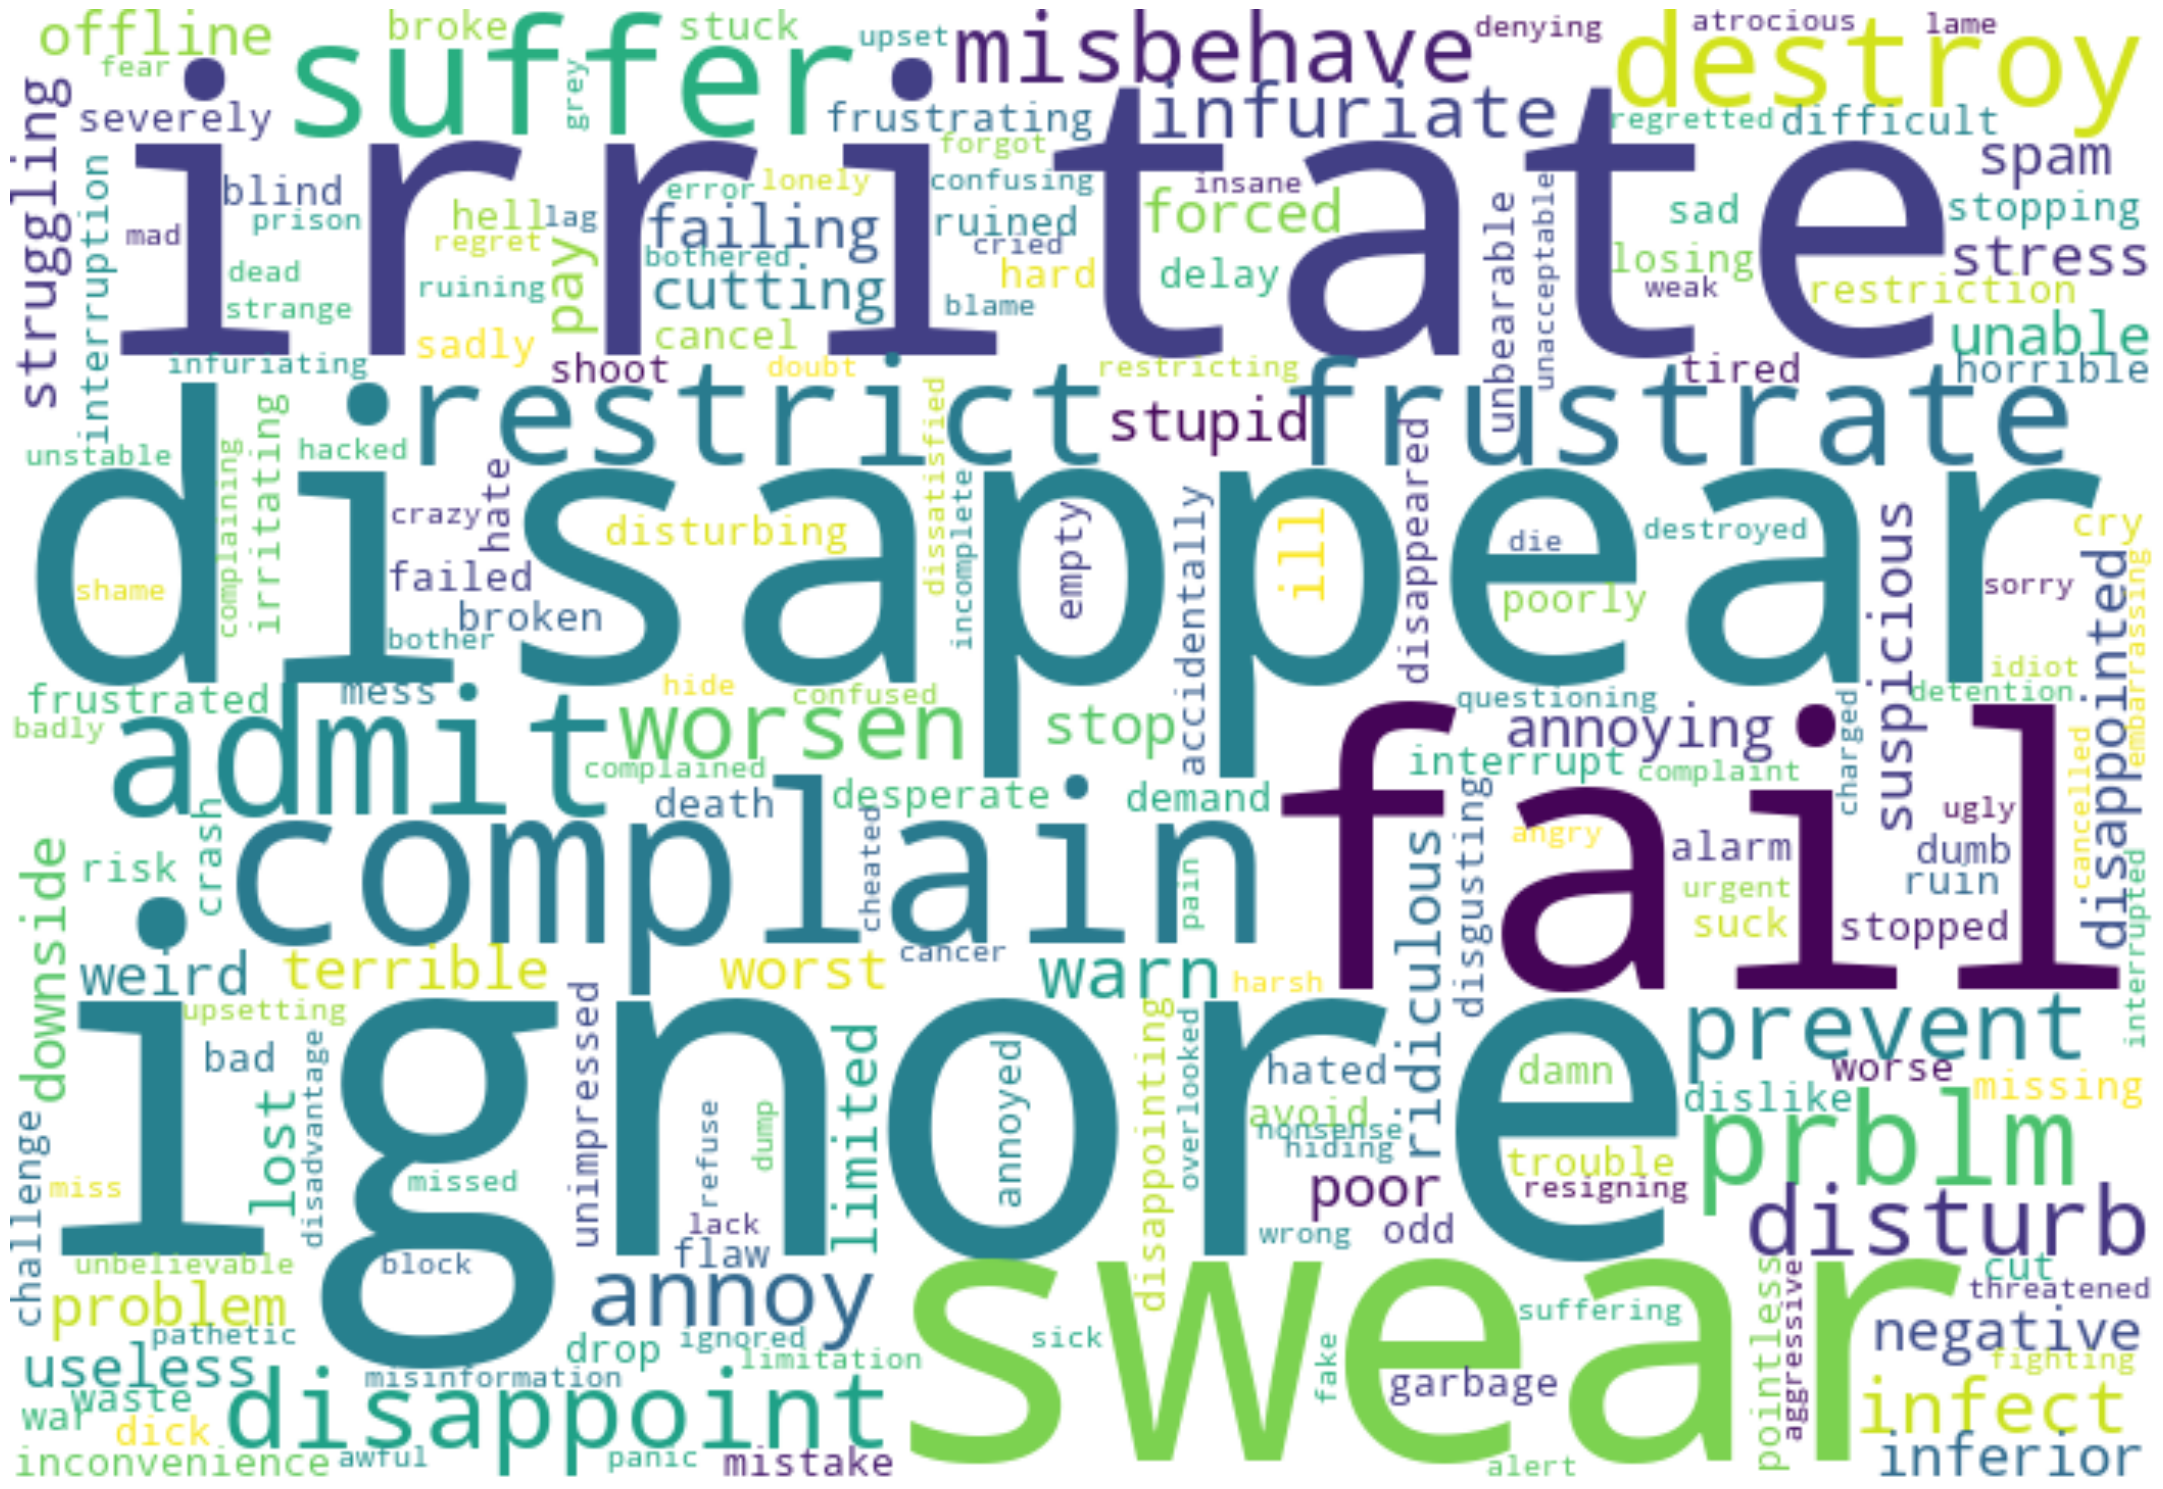

In [35]:
from wordcloud import WordCloud

wrd = WordCloud(background_color='white', width=700, height=480, margin=0, collocations=False,
               stopwords=stop_words)

# Generate the word cloud
neg_wordcloud = wrd.generate(' '.join(negative_words))

# ' '.join(rep_to_negs_list)

# Plot the word cloud
plt.figure(figsize=(30, 15))
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()  # Adjust layout to make it tighter
plt.show()

### 4. Turning Scores as Absolute Values
After getting the Sentiment type as str values

In [36]:
spoti_experiment['Score'] = spoti_experiment['Score'].apply(lambda score: abs(score))
spoti_experiment.head()

Date                                             Review  \
0  2022-07-09 15:00:00  great music service, the audio is high quality...   
1  2022-07-09 14:21:22  please ignore previous negative rating. this a...   
2  2022-07-09 13:27:32  this pop-up "get the best spotify experience o...   
3  2022-07-09 13:26:45    really buggy and terrible to use as of recently   
4  2022-07-09 13:20:49  dear spotify why do i get songs that i didn't ...   

   Rating Is replied?                                               Tags  \
0       5          No  [great, music, service, audio, high, quality, ...   
1       5          No  [please, ignore, previous, negative, rating, a...   
2       4          No  [popup, get, best, experience, android, annoyi...   
3       1          No                             [buggy, terrible, use]   
4       1          No    [dear, get, song, put, playlist, shuffle, play]   

    Score Sentiment  
0  0.9169  positive  
1  0.6249  positive  
2  0.5859  positive  
3  0.4767  negative  
4  0.6124  positive

### 5. Adding the 'Status' and 'Stakeholder' column
For future Open and Closed problems from reviews **and** the responsible area assigned for troubleshooting.

In [37]:
# Define a lambda function to return 'open' for each row
spoti_experiment['Status'] = spoti_reviews.apply(lambda row: 'open', axis=1)
spoti_experiment['Stakeholder'] = spoti_reviews.apply(lambda row: 'TBD', axis=1) # TBD: To Be Defined
spoti_experiment.head()

Date                                             Review  \
0  2022-07-09 15:00:00  great music service, the audio is high quality...   
1  2022-07-09 14:21:22  please ignore previous negative rating. this a...   
2  2022-07-09 13:27:32  this pop-up "get the best spotify experience o...   
3  2022-07-09 13:26:45    really buggy and terrible to use as of recently   
4  2022-07-09 13:20:49  dear spotify why do i get songs that i didn't ...   

   Rating Is replied?                                               Tags  \
0       5          No  [great, music, service, audio, high, quality, ...   
1       5          No  [please, ignore, previous, negative, rating, a...   
2       4          No  [popup, get, best, experience, android, annoyi...   
3       1          No                             [buggy, terrible, use]   
4       1          No    [dear, get, song, put, playlist, shuffle, play]   

    Score Sentiment Status Stakeholder  
0  0.9169  positive   open         TBD  
1  0.6249  positive   open         TBD  
2  0.5859  positive   open         TBD  
3  0.4767  negative   open         TBD  
4  0.6124  positive   open         TBD

---------------------------------------------------------------------------------------------------------------------
# Part IV - Reviews Categorization
---------------------------------------------------------------------------------------------------------------------

This part involves categorizing user reviews to build **KPIs for Customer Service.** Reviews are analyzed to determine positive, negative, or neutral sentiments, getting insights into Customer Service performance and areas for improvement on the Spotify platform.

---------------------------------------------------------------------------------------------------------------------

#### Backup of the Dataframe

In [38]:
spoti_experiment_v2 = spoti_experiment.copy()
spoti_experiment_v2.head()

Date                                             Review  \
0  2022-07-09 15:00:00  great music service, the audio is high quality...   
1  2022-07-09 14:21:22  please ignore previous negative rating. this a...   
2  2022-07-09 13:27:32  this pop-up "get the best spotify experience o...   
3  2022-07-09 13:26:45    really buggy and terrible to use as of recently   
4  2022-07-09 13:20:49  dear spotify why do i get songs that i didn't ...   

   Rating Is replied?                                               Tags  \
0       5          No  [great, music, service, audio, high, quality, ...   
1       5          No  [please, ignore, previous, negative, rating, a...   
2       4          No  [popup, get, best, experience, android, annoyi...   
3       1          No                             [buggy, terrible, use]   
4       1          No    [dear, get, song, put, playlist, shuffle, play]   

    Score Sentiment Status Stakeholder  
0  0.9169  positive   open         TBD  
1  0.6249  positive   open         TBD  
2  0.5859  positive   open         TBD  
3  0.4767  negative   open         TBD  
4  0.6124  positive   open         TBD

#### Getting the tags for the reviews
I am going to work on getting the most relevant frequent words, **in order to** get a pattern and maybe, put the reviews into categories.

In [39]:
from collections import Counter

# Concatenate all the lists of words from the 'Tags' column into a single list
all_tags = [tag for tags_list in spoti_experiment_v2['Tags'] for tag in tags_list]

# Count the frequency of each word
word_counts = Counter(all_tags)

# Sort the result in descending order by word frequency
sorted_word_counts = word_counts.most_common()

# Display the words and their frequency in descending order
for word, count in sorted_word_counts:
    print(f"{word}: {count}")

app: 35502
song: 32889
music: 25513
play: 13514
ad: 10264
playlist: 10157
like: 9914
listen: 9324
love: 9035
premium: 8944
good: 8704
great: 7262
even: 6983
time: 6658
get: 6591
want: 6439
playing: 6378
update: 6106
use: 6003
fix: 4970
please: 4797
work: 4698
best: 4614
every: 4580
stop: 4575
add: 4291
keep: 4251
phone: 4161
would: 3943
listening: 3935
also: 3802
new: 3559
back: 3525
problem: 3521
make: 3477
many: 3472
issue: 3444
still: 3383
skip: 3362
free: 3259
podcasts: 3137
much: 3081
go: 3080
year: 3023
using: 2997
annoying: 2976
need: 2964
without: 2909
star: 2878
way: 2860
thing: 2800
better: 2692
pay: 2687
find: 2557
used: 2522
always: 2429
day: 2395
give: 2381
feature: 2374
service: 2360
artist: 2346
shuffle: 2324
easy: 2312
show: 2312
account: 2254
option: 2196
know: 2127
podcast: 2100
experience: 2059
download: 2056
never: 2040
downloaded: 1999
amazing: 1997
lot: 1997
user: 1976
offline: 1966
able: 1948
bug: 1922
version: 1913
try: 1857
pause: 1846
last: 1838
quality: 1813


In [40]:
type(all_tags)

list

### 1. Spliting the Dataframe per Sentiment type

**1.1. Negative Sentiments:** In order to check the problems to solve and improve **Customer Experience.**

In [41]:
neg_spoti_reviews = spoti_experiment_v2[spoti_experiment_v2['Sentiment'] == 'negative'].reset_index(drop=True)

In [42]:
neg_spoti_reviews.head()

Date                                             Review  \
0  2022-07-09 13:26:45    really buggy and terrible to use as of recently   
1  2022-07-09 13:20:20  the player controls sometimes disappear for no...   
2  2022-07-09 13:09:25  worst app always says i'm offline and never sh...   
3  2022-07-09 13:00:22  android user - there are loads of glitches wit...   
4  2022-07-09 13:00:04  i can't listen to my downloaded playlist while...   

   Rating Is replied?                                               Tags  \
0       1          No                             [buggy, terrible, use]   
1       3          No  [player, control, disappear, reason, app, rest...   
2       1          No  [worst, app, always, offline, never, showed, s...   
3       2          No  [android, user, load, glitch, app, player, bar...   
4       3          No  [listen, downloaded, playlist, offline, whats,...   

    Score Sentiment Status Stakeholder  
0  0.4767  negative   open         TBD  
1  0.0258  negative   open         TBD  
2  0.6808  negative   open         TBD  
3  0.0258  negative   open         TBD  
4  0.5574  negative   open         TBD

In [43]:
type(neg_spoti_reviews['Tags'][0][0])

str

In [44]:
# Initialize a counter to store the frequency of each tag
tag_frequency_counter = Counter()

# Iterate over each list of tags in the 'Tags' column
for tags_list in neg_spoti_reviews['Tags']:
    # Update the counter with the tags from the current list
    tag_frequency_counter.update(tags_list)

# Get the most common tags and their frequencies
most_common_tags = tag_frequency_counter.most_common()

# Print the most common tags and their frequencies
print("Most common tags and their frequencies:\n")
for tag, frequency in most_common_tags:
    print(f"{tag}: {frequency}")

Most common tags and their frequencies:

app: 8843
song: 6886
music: 4045
ad: 2632
stop: 2414
premium: 2389
play: 2362
update: 2350
time: 2204
playlist: 2116
even: 2103
playing: 2020
listen: 1943
get: 1842
fix: 1519
problem: 1474
keep: 1422
annoying: 1416
every: 1353
want: 1345
work: 1310
phone: 1288
use: 1255
like: 1176
pay: 1071
back: 1067
issue: 1010
skip: 1010
still: 963
new: 912
also: 878
bad: 871
go: 863
many: 861
add: 852
please: 834
randomly: 820
make: 814
crash: 806
podcasts: 791
worst: 755
account: 752
year: 749
offline: 748
downloaded: 737
way: 736
listening: 736
show: 724
hate: 721
without: 717
using: 715
need: 703
would: 690
last: 677
control: 675
podcast: 673
service: 671
good: 670
pause: 666
getting: 643
bar: 633
day: 633
start: 628
never: 625
thing: 622
star: 619
bug: 619
working: 604
subscription: 595
always: 586
shuffle: 586
used: 580
open: 568
constantly: 562
paying: 558
something: 552
suck: 545
try: 544
much: 540
going: 532
worse: 528
tried: 524
give: 513
user: 507


**1.2. Positive Sentiments:** Focusing on positives to encourage **best effective practices.**

In [45]:
pos_spoti_reviews = spoti_experiment_v2[spoti_experiment_v2['Sentiment'] == 'positive'].reset_index(drop=True)

In [46]:
pos_spoti_reviews.head()

Date                                             Review  \
0  2022-07-09 15:00:00  great music service, the audio is high quality...   
1  2022-07-09 14:21:22  please ignore previous negative rating. this a...   
2  2022-07-09 13:27:32  this pop-up "get the best spotify experience o...   
3  2022-07-09 13:20:49  dear spotify why do i get songs that i didn't ...   
4  2022-07-09 13:19:21  i love the selection and the lyrics are provid...   

   Rating Is replied?                                               Tags  \
0       5          No  [great, music, service, audio, high, quality, ...   
1       5          No  [please, ignore, previous, negative, rating, a...   
2       4          No  [popup, get, best, experience, android, annoyi...   
3       1          No    [dear, get, song, put, playlist, shuffle, play]   
4       5          No  [love, selection, lyric, provided, song, liste...   

    Score Sentiment Status Stakeholder  
0  0.9169  positive   open         TBD  
1  0.6249  positive   open         TBD  
2  0.5859  positive   open         TBD  
3  0.6124  positive   open         TBD  
4  0.6369  positive   open         TBD

In [47]:
# Initialize a counter to store the frequency of each tag
tag_frequency_counter = Counter()

# Iterate over each list of tags in the 'Tags' column
for tags_list in pos_spoti_reviews['Tags']:
    # Update the counter with the tags from the current list
    tag_frequency_counter.update(tags_list)

# Get the most common tags and their frequencies
most_common_tags = tag_frequency_counter.most_common()

# Print the most common tags and their frequencies
print("Most common tags and their frequencies:\n")
for tag, frequency in most_common_tags:
    print(f"{tag}: {frequency}")

Most common tags and their frequencies:

app: 25429
song: 24783
music: 20603
play: 11079
love: 8816
like: 8697
good: 7999
playlist: 7689
listen: 7033
great: 7032
ad: 6903
premium: 6119
want: 5043
even: 4564
best: 4545
use: 4514
get: 4494
playing: 4317
time: 4158
please: 3940
update: 3423
fix: 3299
add: 3222
would: 3150
work: 3148
listening: 3047
free: 2981
every: 2940
also: 2831
phone: 2644
keep: 2556
make: 2545
new: 2488
better: 2371
much: 2355
many: 2334
issue: 2278
back: 2263
easy: 2252
still: 2231
skip: 2230
podcasts: 2227
using: 2156
year: 2146
stop: 2123
thing: 2109
star: 2102
go: 2076
without: 2063
need: 2054
problem: 2018
find: 2017
way: 2005
amazing: 1948
artist: 1925
used: 1867
feature: 1835
give: 1763
always: 1704
option: 1654
day: 1644
shuffle: 1643
service: 1632
pay: 1602
favorite: 1558
nice: 1548
know: 1538
annoying: 1530
experience: 1518
quality: 1499
lot: 1488
download: 1476
show: 1460
well: 1454
lyric: 1449
able: 1448
enjoy: 1428
user: 1410
version: 1407
podcast: 1351


**1.3. Neutral Sentiments:** Examining neutral feedback for **potential improvements.**

In [48]:
neu_spoti_reviews = spoti_experiment_v2[spoti_experiment_v2['Sentiment'] == 'neutral'].reset_index(drop=True)

In [49]:
neu_spoti_reviews.head()

Date                                             Review  \
0  2022-07-09 12:38:23  i logged out on my acc but when i tried to ope...   
1  2022-07-09 12:03:03  am unable to use on my ph .....it gets downloa...   
2  2022-07-09 11:57:09  no commercials, and no adds no need for wifi i...   
3  2022-07-09 11:54:13                     wide range of songs collection   
4  2022-07-09 11:34:47  my account was glitching so i logged out to tr...   

   Rating Is replied?                                               Tags  \
0       3          No   [logged, acc, tried, open, log, open, see, logo]   
1       1          No    [unable, use, ph, get, downloaded, unable, log]   
2       5          No  [commercial, add, need, wifi, use, satellite, ...   
3       5          No                    [wide, range, song, collection]   
4       2          No  [account, glitching, logged, try, fix, log, ba...   

   Score Sentiment Status Stakeholder  
0    0.0   neutral   open         TBD  
1    0.0   neutral   open         TBD  
2    0.0   neutral   open         TBD  
3    0.0   neutral   open         TBD  
4    0.0   neutral   open         TBD

In [50]:
num_positives = len(pos_spoti_reviews)
num_positives

44004

In [51]:
num_negatives = len(neg_spoti_reviews)
num_negatives

13181

In [52]:
num_neutral = len(neu_spoti_reviews)
num_neutral

4145

In [53]:
total_reviews = len(spoti_experiment_v2)
total_reviews

61330

In [54]:
print('% negatives: ', round(num_negatives/total_reviews*100,2),'%')
print('% positives: ', round(num_positives/total_reviews*100,2),'%')
print('% neutral: ', round(num_neutral/total_reviews*100,2),'%')

% negatives:  21.49 %
% positives:  71.75 %
% neutral:  6.76 %


### 2. Defining the categories and the associated keywords for each

#### 2.1. Issue Management from Negative Reviews

In [55]:
# Categories for negative reviews

categories_keywords = {
    'Connectivity': ['wifi', 'offline', 'connected', 'bluetooth', 'internet', 'connection', 'quality', 'audio', 'data', 'unstable', 'lag'],
    'Functionality': ['launch', 'stop', 'login', 'fix', 'issue', 'reinstall', 'reinstalled', 'reinstalling', 'feature', 'glitch', 'glitchy', 'bug', 'buggy', 'slow', 'update', 'setting', 'crash', 'software', 'developer', 'upgrade'],
    'UX/UI': ['ad', 'pop', 'ui', 'design', 'add', 'option', 'advertisement', 'access', 'feel', 'sad', 'disappear', 'disappears', 'control', 'shuffle', 'random', 'randomly', 'hate', 'experience', 'skip', 'annoying', 'worst', 'notification', 'swipe', 'opening', 'permission'],
    'Subscriptions': ['premium', 'subscription', 'subscriber', 'cancel', 'downloaded', 'download', 'downloads', 'service', 'card', 'family', 'customers', 'money', 'account', 'payment', 'paid', 'linked', 'email', 'password', 'debit', 'credit', 'amazon', 'subscription', 'trial'],
    'Content Playback': ['song', 'music', 'playlist', 'podcast', 'podcasts', 'lyric', 'recommendation', 'recommend', 'queue', 'find']
}

# Function to assign a category to each review
def categorize_review(tags):
    for category, keywords in categories_keywords.items():
        for keyword in keywords:
            if keyword in tags:
                return category
    return 'Other'  # If no category is found, assign 'Other'



# Apply the function to each row and create the category column
neg_spoti_reviews['Category'] = neg_spoti_reviews['Tags'].apply(categorize_review)

In [56]:
neg_spoti_reviews.head()

Date                                             Review  \
0  2022-07-09 13:26:45    really buggy and terrible to use as of recently   
1  2022-07-09 13:20:20  the player controls sometimes disappear for no...   
2  2022-07-09 13:09:25  worst app always says i'm offline and never sh...   
3  2022-07-09 13:00:22  android user - there are loads of glitches wit...   
4  2022-07-09 13:00:04  i can't listen to my downloaded playlist while...   

   Rating Is replied?                                               Tags  \
0       1          No                             [buggy, terrible, use]   
1       3          No  [player, control, disappear, reason, app, rest...   
2       1          No  [worst, app, always, offline, never, showed, s...   
3       2          No  [android, user, load, glitch, app, player, bar...   
4       3          No  [listen, downloaded, playlist, offline, whats,...   

    Score Sentiment Status Stakeholder       Category  
0  0.4767  negative   open         TBD  Functionality  
1  0.0258  negative   open         TBD  Functionality  
2  0.6808  negative   open         TBD   Connectivity  
3  0.0258  negative   open         TBD  Functionality  
4  0.5574  negative   open         TBD   Connectivity

In [57]:
neg_spoti_reviews['Category'].unique()

array(['Functionality', 'Connectivity', 'UX/UI', 'Subscriptions',
       'Content Playback', 'Other'], dtype=object)

In [58]:
neg_spoti_reviews_v2 = neg_spoti_reviews.copy()

In [59]:
# Total number of reviews
reviews_count = len(neg_spoti_reviews)
reviews_count

13181

In [60]:
# Total number of reviews with No replies
no_reply_count = len(neg_spoti_reviews[neg_spoti_reviews['Is replied?'] == 'No' ])
no_reply_count

13114

In [61]:
# Number of replied reviews
replied_count = reviews_count - no_reply_count
replied_count

67

In [62]:
# Functionality
functionality = len(neg_spoti_reviews[(neg_spoti_reviews['Category'] == 'Functionality') & (neg_spoti_reviews['Is replied?'] != 'No')])
print('functionality:', functionality)

functionality: 34


In [63]:
# Music Playback
music_playback = len(neg_spoti_reviews[(neg_spoti_reviews['Category'] == 'Music Playback') & (neg_spoti_reviews['Is replied?'] != 'No')])
print('music_playback:', music_playback)

music_playback: 0


In [64]:
# Other
other = len(neg_spoti_reviews[(neg_spoti_reviews['Category'] == 'Other') & (neg_spoti_reviews['Is replied?'] != 'No')])
print('other:', other)

other: 3


In [65]:
# QA and CX
qa_cx = len(neg_spoti_reviews[(neg_spoti_reviews['Category'] == 'QA and CX') & (neg_spoti_reviews['Is replied?'] != 'No')])
print('qa_cx:', qa_cx)

qa_cx: 0


In [66]:
# Connectivity and Usage
con_usa = len(neg_spoti_reviews[(neg_spoti_reviews['Category'] == 'Connectivity and Usage') & (neg_spoti_reviews['Is replied?'] != 'No')])
print('con_usa:', con_usa)

con_usa: 0


In [67]:
# UX/UI
ux_ui = len(neg_spoti_reviews[(neg_spoti_reviews['Category'] == 'UX/UI') & (neg_spoti_reviews['Is replied?'] != 'No')])
print('ux_ui:', ux_ui)

ux_ui: 9


#### 2.2. Feature Satisfaction from Positive Reviews

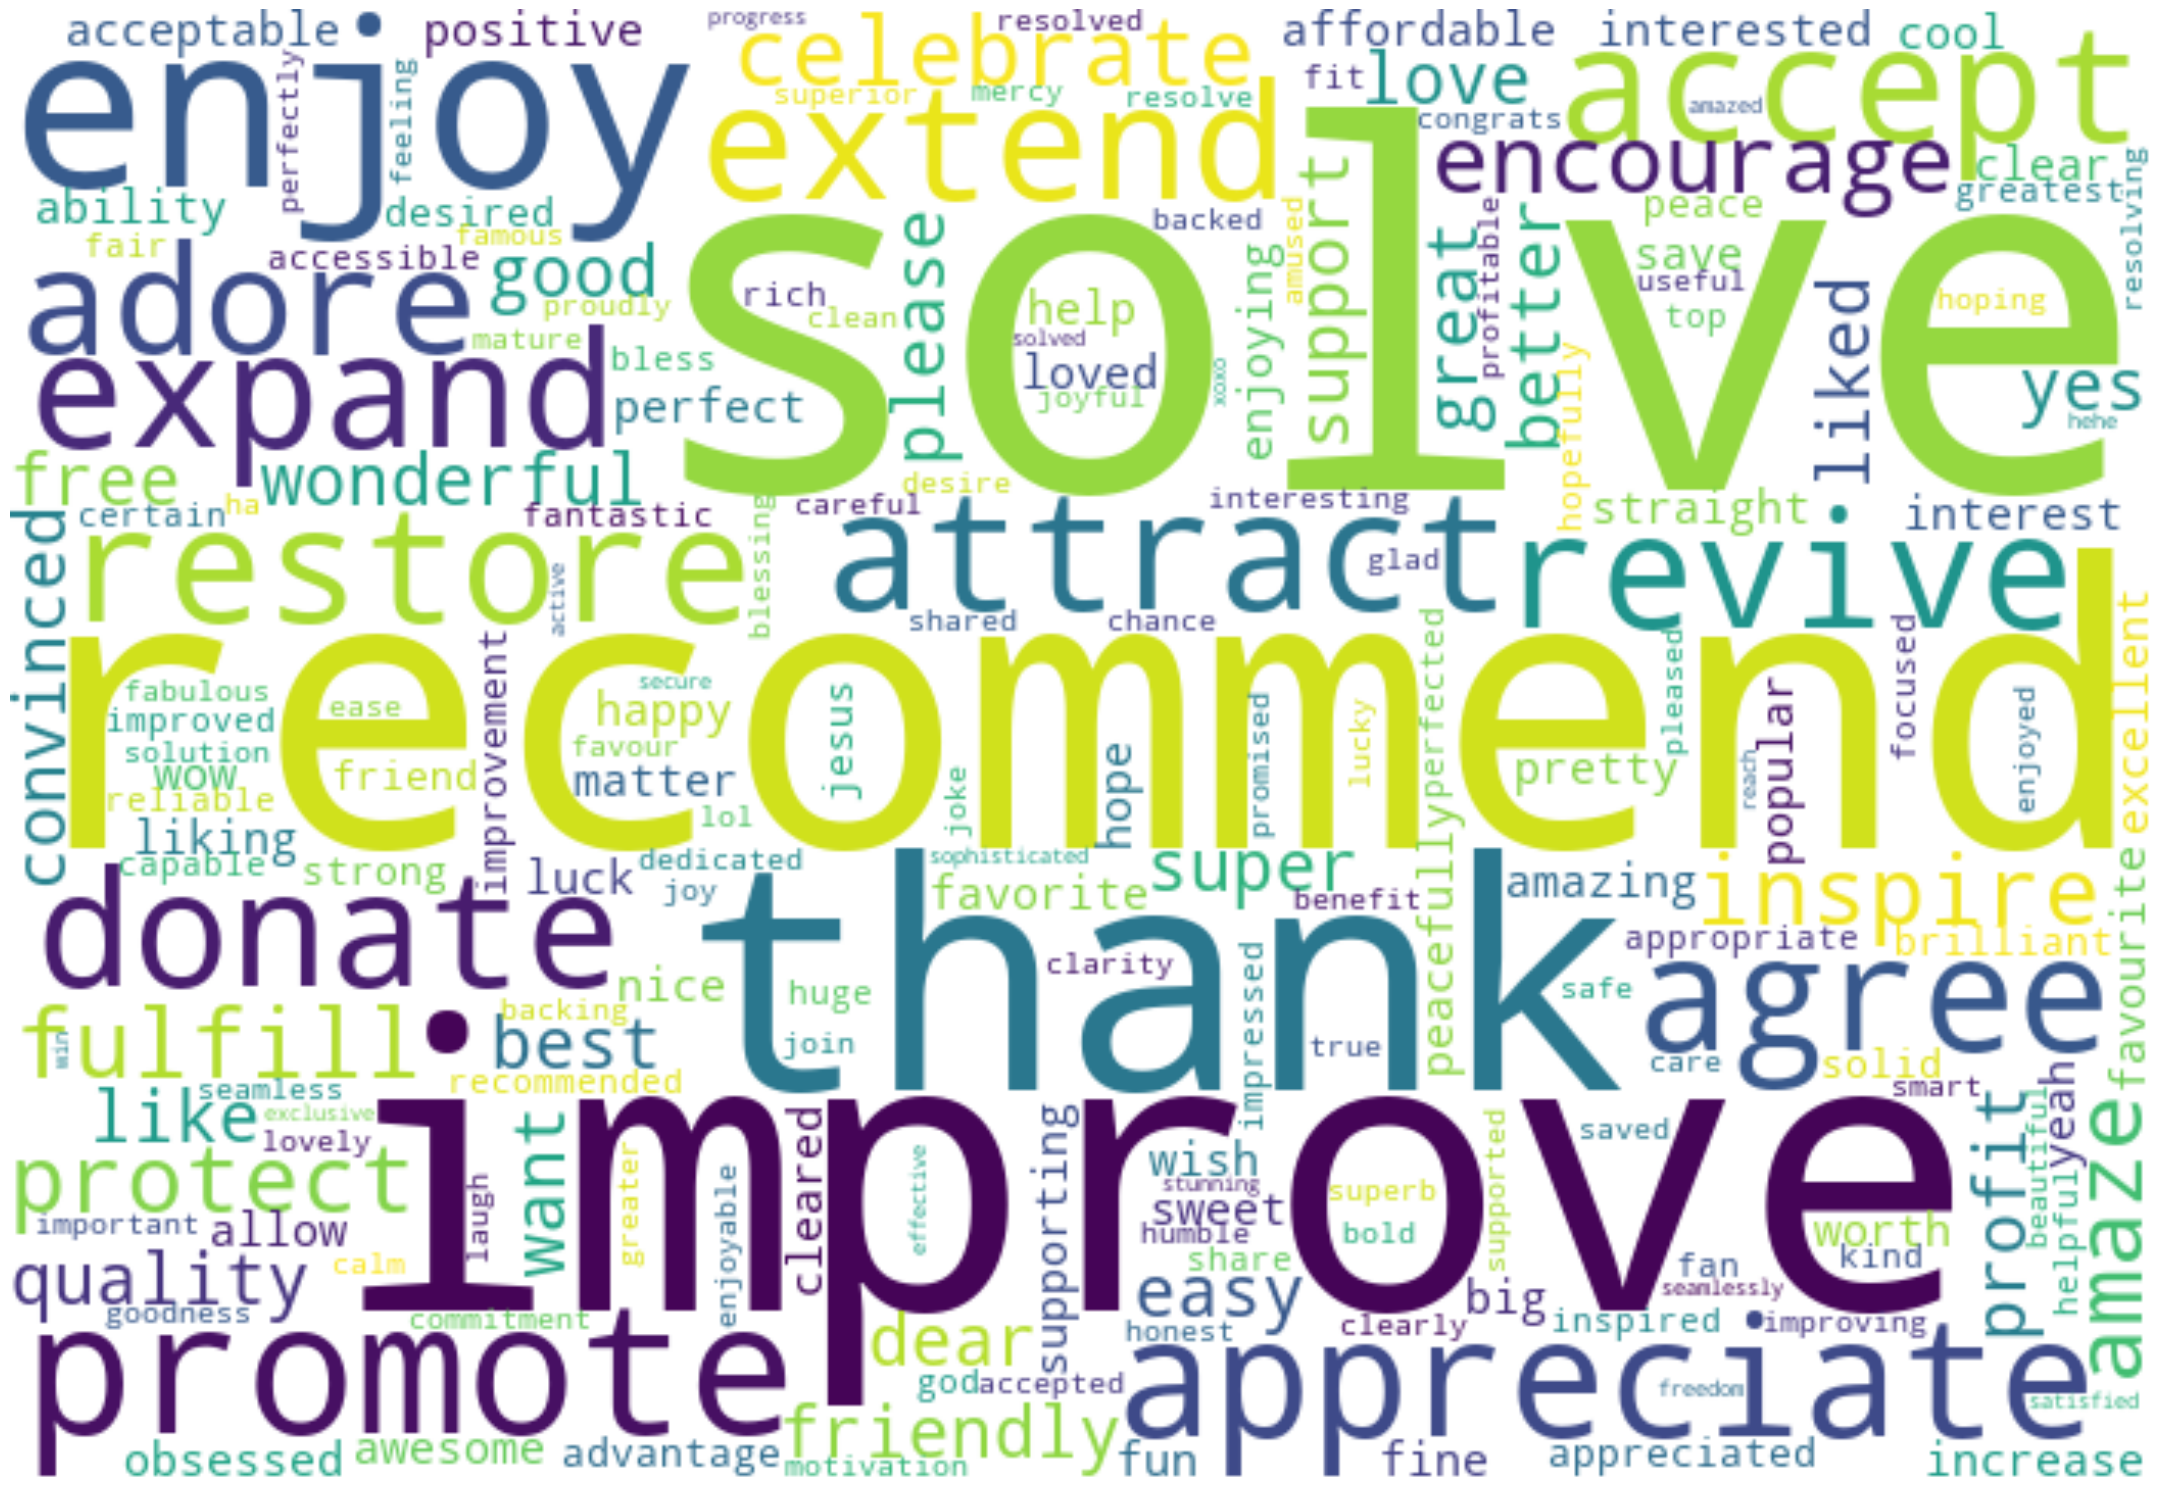

In [68]:
wrd = WordCloud(background_color='white', width=700, height=480, margin=0, collocations=False,
               stopwords=stop_words)

# Generate the word cloud
pos_wordcloud = wrd.generate(' '.join(positive_words))

# Plot the word cloud
plt.figure(figsize=(30, 15))
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()  # Adjust layout to make it tighter
plt.show()

In [69]:
# Categories for positive reviews

categories_keywords = {
    'UX/UI': ['mobile','option', 'easy', 'make', 'better', 'much', 'many',  'without', 'thing', 'able', 'user', 'version', 'control', 'interface', 'user', 'experience'],
    'Functionality': ['bluetooth','using','feature','play', 'playing','use', 'work', 'update', 'add',  'make', 'better', 'much', 'many', 'without', 'thing', 'able', 'version', 'control', 'functionality'],
    'Service & Content Quality': ['music', 'song', 'playlist', 'premium', 'artist', 'quality', 'download', 'show', 'podcast', 'podcasts','library', 'content', 'selection', 'recommendation', 'album', 'stream', 'streaming', 'audio', 'variety', 'track', 'genre', 'lyric', 'offline', 'shuffle', 'download', 'offline', 'suggestion', 'collection', 'personalized'],
    'General Satisfaction': ['enjoy','enjoying','worth','attract','love', 'like', 'good', 'great', 'amazing', 'favorite', 'nice', 'excellent', 'happy', 'enjoyable', 'wonderful', 'awesome', 'perfect', 'superb', 'fantastic', 'outstanding', 'thanks', 'thank', 'loved', 'loved', 'satisfied', 'satisfied','cool'],
    'Suggestions': ['misinformation','support','keep','every','also', 'every', 'still','would','bad','advertisement','delete','pop','popup','slow','still','random','keep','bug','need', 'find', 'way','restore','solve','promote','ad', 'annoying', 'issue', 'back', 'stop', 'annoying', 'crash', 'glitch', 'bug', 'freeze', 'unstable', 'problematic', 'problem', 'frustrating', 'irritating', 'inconvenient', 'terrible', 'awful', 'horrible', 'worst', 'disappointing', 'unhappy', 'dislike', 'hate', 'cancel', 'waste', 'useless', 'unreliable', 'dissatisfaction','want', 'please', 'would', 'update', 'fix', 'ad', 'work', 'need', 'problem', 'find', 'way', 'without', 'change', 'wish', 'request', 'improvement', 'improve', 'better', 'better', 'feature', 'option', 'add', 'recommend','recommendation','issue', 'fix']
}

# Function to assign a category to each review
def categorize_review(tags):
    for category, keywords in categories_keywords.items():
        for keyword in keywords:
            if keyword in tags:
                return category
    return 'Other'  # If no category is found, assign 'Other'



# Apply the function to each row and create the category column
pos_spoti_reviews['Category'] = pos_spoti_reviews['Tags'].apply(categorize_review)

---------------------------------------------------------------------------------------------------------------------
# Part V - Reporting and Visualization
---------------------------------------------------------------------------------------------------------------------

Creating visual reports and data visualizations based on the categorized user reviews from Part IV. The final processed dataset will be visualized in **Tableau Public.** 

It will show insights and findings derived from sentiment analysis in an understandable and visually appealing manner to provide stakeholders with actionable insights; to make informed decisions and drive improvements in customer service on the Spotify platform.

---------------------------------------------------------------------------------------------------------------------

### 1. Negative Reviews Visualization

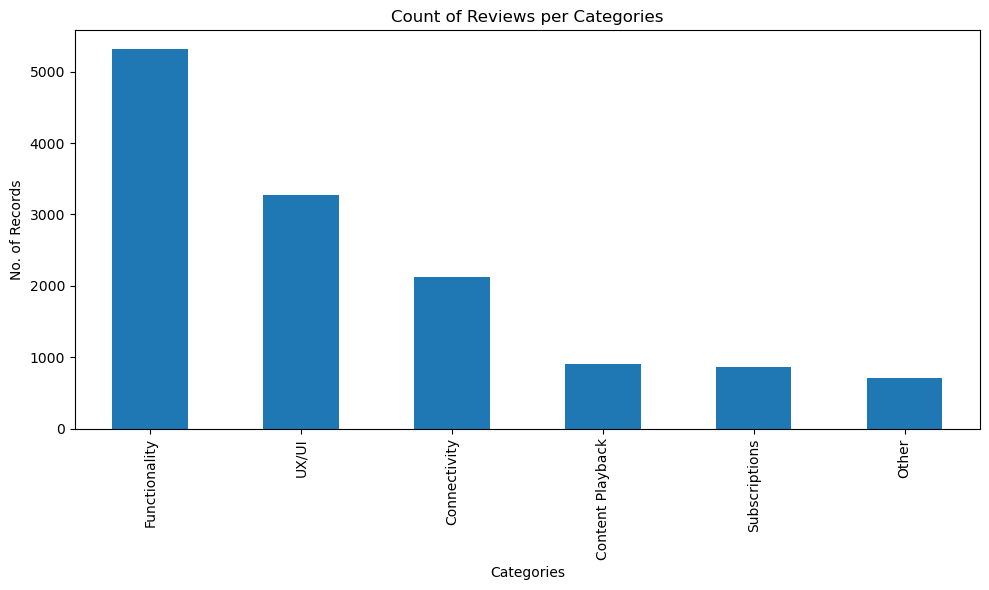

In [70]:
# Your code here

plt.figure(figsize=(10, 6))
neg_spoti_reviews_v2['Category'].value_counts().plot(kind='bar')
plt.title('Count of Reviews per Categories')
plt.xlabel('Categories')
plt.ylabel('No. of Records')
plt.tight_layout()
plt.show()

### 2. Positive Reviews Visualization

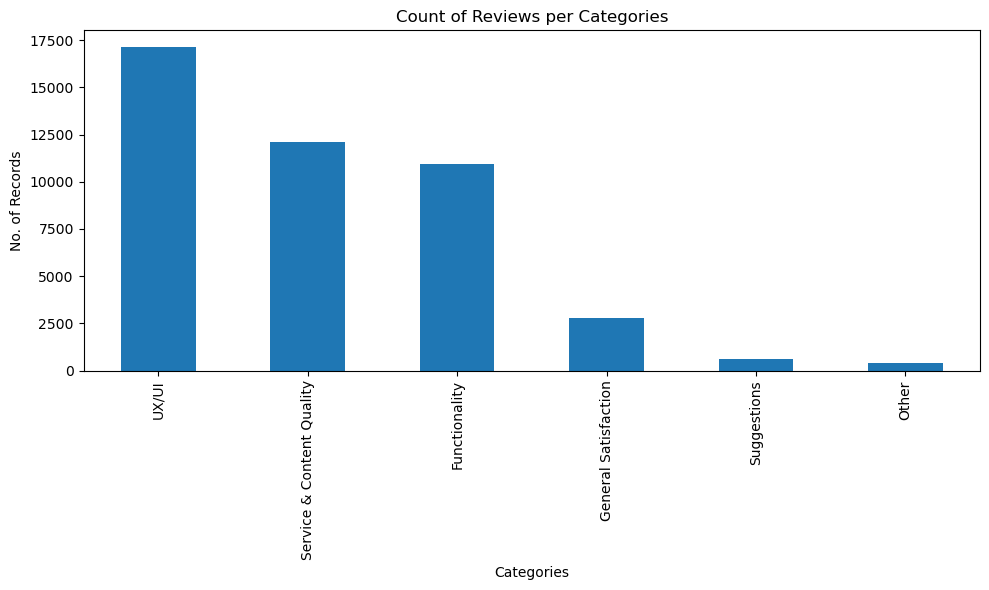

In [71]:
# Your code here

plt.figure(figsize=(10, 6))
pos_spoti_reviews['Category'].value_counts().plot(kind='bar')
plt.title('Count of Reviews per Categories')
plt.xlabel('Categories')
plt.ylabel('No. of Records')
plt.tight_layout()
plt.show()

### 3. Reviews Concatenation for Reporting and Visualization

In [72]:
reviews_report = pd.concat([neg_spoti_reviews, pos_spoti_reviews], sort=False)
column_order = ['Date', 'Review', 'Rating', 'Is replied?', 'Tags', 'Sentiment','Score', 'Category', 'Stakeholder', 'Status']
reviews_report = reviews_report[column_order]
reviews_report.head()

Date                                             Review  \
0  2022-07-09 13:26:45    really buggy and terrible to use as of recently   
1  2022-07-09 13:20:20  the player controls sometimes disappear for no...   
2  2022-07-09 13:09:25  worst app always says i'm offline and never sh...   
3  2022-07-09 13:00:22  android user - there are loads of glitches wit...   
4  2022-07-09 13:00:04  i can't listen to my downloaded playlist while...   

   Rating Is replied?                                               Tags  \
0       1          No                             [buggy, terrible, use]   
1       3          No  [player, control, disappear, reason, app, rest...   
2       1          No  [worst, app, always, offline, never, showed, s...   
3       2          No  [android, user, load, glitch, app, player, bar...   
4       3          No  [listen, downloaded, playlist, offline, whats,...   

  Sentiment   Score       Category Stakeholder Status  
0  negative  0.4767  Functionality         TBD   open  
1  negative  0.0258  Functionality         TBD   open  
2  negative  0.6808   Connectivity         TBD   open  
3  negative  0.0258  Functionality         TBD   open  
4  negative  0.5574   Connectivity         TBD   open

In [76]:
reviews_report.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57185 entries, 0 to 44003
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         57185 non-null  object 
 1   Review       57185 non-null  object 
 2   Rating       57185 non-null  int64  
 3   Is replied?  57185 non-null  object 
 4   Tags         57185 non-null  object 
 5   Sentiment    57185 non-null  object 
 6   Score        57185 non-null  float64
 7   Category     57185 non-null  object 
 8   Stakeholder  57185 non-null  object 
 9   Status       57185 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 4.8+ MB


### 4. Export .csv for Reporting and Visualization in Tableau Public

In [78]:
# from pathlib import Path
# filepath = Path('./Processed/reviews_report.csv', index=False)  
# filepath.parent.mkdir(parents=True, exist_ok=True) 
# reviews_report.to_csv(filepath, index=False, encoding='utf-8')